In [1]:
import json 
import matplotlib.pyplot as plt 
import numpy as np
import datetime

In [2]:
def readJsonManually(name):
    f = open(name,'r', encoding='utf8')
    data = json.load(f) 
    f.close()
    return data

def saveJson(dictt):
    f = open('newData.json','w', encoding='utf8')
    data = json.dump(dictt,f) 
    f.close()

In [3]:
weekPeriod = 7 * 24 * 60 * 60 * 1000
hour = 60 * 60 * 1000
day = 24 * 60 * 60 * 1000

In [4]:
def convertMillis(millis):
    hours=int(millis/(1000*60*60))
    hours = int(hours)
    millis-=hours*60*60*1000
    
    minutes=int(millis/(1000*60))
    minutes = int(minutes)
    millis-=minutes*60*1000
    
    seconds=int(millis/1000)
    seconds = int(seconds)
   
    
    
    return str(hours)+":"+str(minutes)+":"+str(seconds)

# Already created dataset
#### currently some issues are happening at database. so we are combining new data with previously collected valid data

In [5]:
previousData= readJsonManually('data4.json')  #already collected valid data at checkpoint data3 folder 
#data3 is newjson of data3 folder

In [6]:
#list of already completed users
userInfoPrevious = previousData['UserInfo']
targetHistoryPrevious = previousData['TargetHistory']
usageHistoryPrevious = previousData['UsageHistory']

flag = {}

for x in userInfoPrevious:
    print(x)
    flag[x] = True


0000000202
2016615144
2016331099
2016331068
2016331066
2016331012
2016331037
2016331089
2016331049
2016331102
2016331072


# New dataset

In [7]:
data = readJsonManually('data.json')

In [8]:
userInfo = data['UserInfo']
targetHistory = data['TargetHistory']
usageHistory = data['UsageHistory']

In [9]:
# list of new users whose 3 weeks expermient are done

st = {}
st = set()

for x in userInfo:
    user = userInfo[x]
    if "weekFourTwoStartTime" in user:
        if x not in flag:
            st.add(x)

for x in userInfo:
    user = userInfo[x]
    if "weekThreeStartTime" in user:
        item = targetHistory[x]
        if item['weekNumber'] == 1:
            if x not in flag:
                st.add(x)
                
st.discard('2016331006')

for i in st:
    print(i)

510418137


# new json generation

In [10]:
for i in st:
    userInfoPrevious[i] = userInfo[i]
    usageHistoryPrevious[i] = usageHistory[i]
    targetHistoryPrevious[i] = targetHistory[i]
    
previousData['TargetHistory'] = targetHistoryPrevious
previousData['UserInfo'] = userInfoPrevious
previousData['UsageHistory'] = usageHistoryPrevious
    
saveJson(previousData)

# new data saved now assign all the data as previous
userInfo = userInfoPrevious
usageHistory = usageHistoryPrevious
targetHistory = targetHistoryPrevious
# these dicts will be used afterwards

# add all users key to st
for x in userInfo:
    st.add(x)
print(st)
print(len(st))

{'2016331089', '2016615144', '2016331102', '0000000202', '2016331066', '510418137', '2016331037', '2016331072', '2016331049', '2016331068', '2016331012', '2016331099'}
12


# Functions

In [11]:
def getUsageOrLaunchCount(startTime,endTime,hour,appsInstallationTime,usage,purpose,weekOne):
    packageName = ""
    usageTimeorCount = 0
    for i in range(startTime,endTime,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                packageName = hourlyUsage["packageName"].replace('.','_dot_')
                if packageName in appsInstallationTime:
                    installTime = appsInstallationTime[packageName]['installationTime']
                    if installTime < weekOne:
                        #hourlyUsage = hourlyUsageArray[0]
                        usageTimeorCount+=hourlyUsage[purpose]
                else:
                    #print(packageName)
                    pass
    return usageTimeorCount

def getAverageWeeklyUsage(purpose):
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0
    weekThree = 0
    weekFour = 0

    avgUsageOrLaunch = [0,0,0]

    userCount = 0

    for key in userInfo:
        userCount+=1
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod


        usage = usageHistory[key]
        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        avgUsageOrLaunch[0]+= getUsageOrLaunchCount(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne)
        avgUsageOrLaunch[1]+= getUsageOrLaunchCount(weekTwo,weekThree,hour,appsInstallationTime,usage,purpose,weekOne)
        avgUsageOrLaunch[2]+= getUsageOrLaunchCount(weekThree,weekFour,hour,appsInstallationTime,usage,purpose,weekOne)


    avgUsageOrLaunch = [int(x / userCount) for x in avgUsageOrLaunch]
    print(avgUsageOrLaunch)
    
    if purpose == "foregroundTime":
        print("{0} , {1} , {2}".format(convertMillis(avgUsageOrLaunch[0]),convertMillis(avgUsageOrLaunch[1]),convertMillis(avgUsageOrLaunch[2])))

    tick_label = ['Week1', 'Week2', 'Week3']
    left = [1,2,3]
    plt.xlabel('x - axis') 
    plt.ylabel('y - axis')
    if purpose == "foregroundTime":
        plt.title('Average Weekly Usage chart') 
    else:
        plt.title('Average Weekly Launch Count chart') 
    plt.bar(left, avgUsageOrLaunch
    , tick_label = tick_label, 
            width = 0.8, color = ['green']) 
    
def plotIndividualUsersUsageInSeperateGraphs(purpose):
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0
    weekThree = 0
    weekFour = 0



    userCount = 0

    fig, ax = plt.subplots(ncols=len(st), figsize=(35, 5)) # len(st) number of user
    #fig, ax = plt.subplots()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    for key in userInfo:
        userCount+=1
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod


        usage = usageHistory[key]
        avgUsageOrLaunch = [0,0,0]

        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        avgUsageOrLaunch[0]+= getUsageOrLaunchCount(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne)
        avgUsageOrLaunch[1]+= getUsageOrLaunchCount(weekTwo,weekThree,hour,appsInstallationTime,usage,purpose,weekOne)
        avgUsageOrLaunch[2]+= getUsageOrLaunchCount(weekThree,weekFour,hour,appsInstallationTime,usage,purpose,weekOne)

        print(avgUsageOrLaunch)
        
        if purpose == "foregroundTime":
            print("{0} , {1} , {2}".format(convertMillis(avgUsageOrLaunch[0]),convertMillis(avgUsageOrLaunch[1]),convertMillis(avgUsageOrLaunch[2])))
            print("average daily usages in week1 {0}".format(convertMillis((avgUsageOrLaunch[0])/7.0)))
        print(key)
        
        tick_label = ['Week1', 'Week2', 'Week3']
        x = np.arange(0,21,10) # the label locations
        width = 0.8  # the width of the bars

        rect = ax[userCount-1].bar(x, avgUsageOrLaunch, width, label=key)
        #autolabel(rect)
        
        if purpose == "foregroundTime":
            ax[userCount-1].set_ylabel('Time in Milis')
            ax[userCount-1].set_title('Weekly Usage chart')
        else:
            ax[userCount-1].set_ylabel('Launched')
            ax[userCount-1].set_title('Weekly Launch Count chart')
        ax[userCount-1].set_xticks(x)
        ax[userCount-1].set_xticklabels(tick_label)
        ax[userCount-1].legend()
        fig.tight_layout()

    plt.show()

# plot average weekly usage in one graph

[147003028, 136299897, 142650200]
40:50:3 , 37:51:39 , 39:37:30


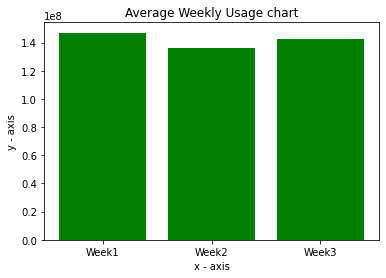

In [12]:
getAverageWeeklyUsage("foregroundTime")

# plot all in one graph

[232109511, 277404191, 275335767]
64:28:29 , 77:3:24 , 76:28:55
0000000202
[102348697, 133559099, 137695002]
28:25:48 , 37:5:59 , 38:14:55
2016615144
[152578906, 150297262, 122818351]
42:22:58 , 41:44:57 , 34:6:58
2016331099
[147983660, 113768330, 131245480]
41:6:23 , 31:36:8 , 36:27:25
2016331068
[100772698, 70354346, 131114757]
27:59:32 , 19:32:34 , 36:25:14
2016331066
[80980845, 78645535, 70922364]
22:29:40 , 21:50:45 , 19:42:2
2016331012
[78090589, 57796653, 105650891]
21:41:30 , 16:3:16 , 29:20:50
2016331037
[302750830, 208935137, 275808096]
84:5:50 , 58:2:15 , 76:36:48
2016331089
[169074061, 143053202, 178055425]
46:57:54 , 39:44:13 , 49:27:35
2016331049
[101068282, 88664970, 64129754]
28:4:28 , 24:37:44 , 17:48:49
2016331102
[163475151, 134522311, 74300544]
45:24:35 , 37:22:2 , 20:38:20
2016331072
[132803109, 178597728, 144725975]
36:53:23 , 49:36:37 , 40:12:5
510418137


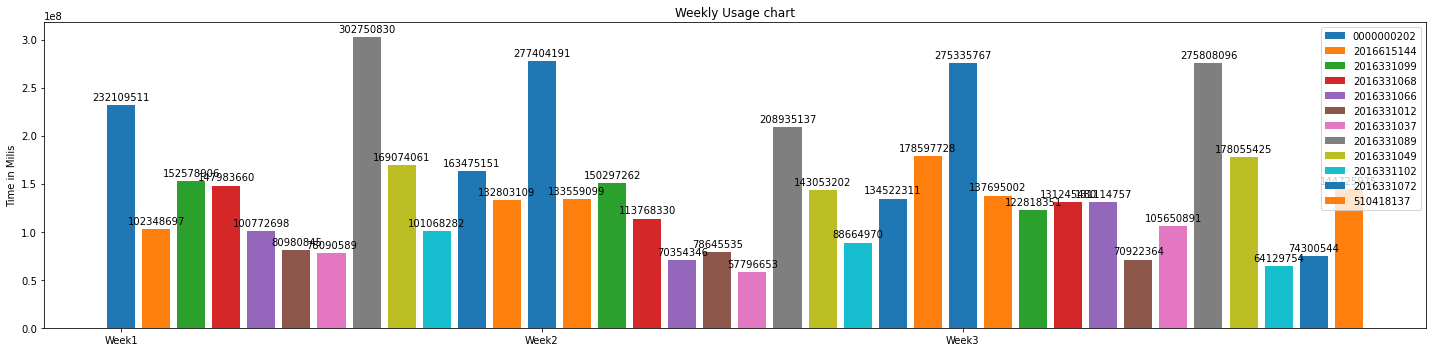

In [13]:
"weekOneStartTime"
"weekTwoStartTime"
"weekThreeStartTime"

weekOne = 0
weekTwo = 0
weekThree = 0
weekFour = 0



userCount = 0

#fig, ax = plt.subplots(ncols=10, figsize=(30, 10))
fig, ax = plt.subplots(figsize=(20,5))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for key in userInfo:
    userCount+=1
    user = userInfo[key]
    weekTwo = user["weekTwoStartTime"]
    weekOne = weekTwo - weekPeriod
    weekThree = weekTwo + weekPeriod
    weekFour = weekThree + weekPeriod

    
    usage = usageHistory[key]
    avgUsage = [0,0,0]
    
    appsInstallationTime = targetHistory[key]['appsInstallationInfo']
    
    avgUsage[0]+= getUsageOrLaunchCount(weekOne,weekTwo,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
    avgUsage[1]+= getUsageOrLaunchCount(weekTwo,weekThree,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
    avgUsage[2]+= getUsageOrLaunchCount(weekThree,weekFour,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
            
    print(avgUsage)
    print("{0} , {1} , {2}".format(convertMillis(avgUsage[0]),convertMillis(avgUsage[1]),convertMillis(avgUsage[2])))
    print(key)
    
    tick_label = ['Week1', 'Week2', 'Week3']
    x = np.arange(0,len(st)*2+1,len(st)) # the label locations for max 10 user currently
    width = 0.8  # the width of the bars
    
    rect = ax.bar(x+userCount-1, avgUsage, width, label=key)
    autolabel(rect)

ax.set_ylabel('Time in Milis')
ax.set_title('Weekly Usage chart')
ax.set_xticks(x)
ax.set_xticklabels(tick_label)
ax.legend()
fig.tight_layout()
    
plt.show()

# plot individual users usage in seperate graphs

[232109511, 277404191, 275335767]
64:28:29 , 77:3:24 , 76:28:55
average daily usages in week1 9:12:38
0000000202
[102348697, 133559099, 137695002]
28:25:48 , 37:5:59 , 38:14:55
average daily usages in week1 4:3:41
2016615144
[152578906, 150297262, 122818351]
42:22:58 , 41:44:57 , 34:6:58
average daily usages in week1 6:3:16
2016331099
[147983660, 113768330, 131245480]
41:6:23 , 31:36:8 , 36:27:25
average daily usages in week1 5:52:20
2016331068
[100772698, 70354346, 131114757]
27:59:32 , 19:32:34 , 36:25:14
average daily usages in week1 3:59:56
2016331066
[80980845, 78645535, 70922364]
22:29:40 , 21:50:45 , 19:42:2
average daily usages in week1 3:12:48
2016331012
[78090589, 57796653, 105650891]
21:41:30 , 16:3:16 , 29:20:50
average daily usages in week1 3:5:55
2016331037
[302750830, 208935137, 275808096]
84:5:50 , 58:2:15 , 76:36:48
average daily usages in week1 12:0:50
2016331089
[169074061, 143053202, 178055425]
46:57:54 , 39:44:13 , 49:27:35
average daily usages in week1 6:42:33
201

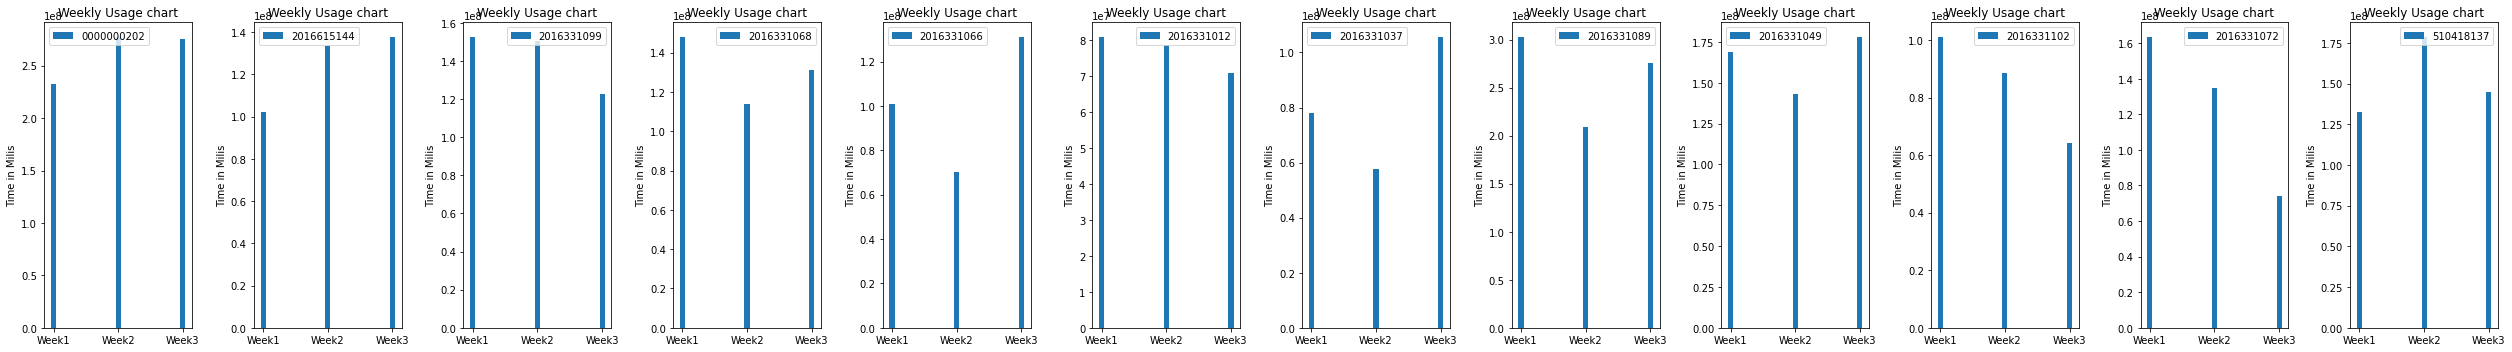

In [14]:
plotIndividualUsersUsageInSeperateGraphs("foregroundTime")

# plot average weekly launch count in one graph

[4422, 4370, 3801]


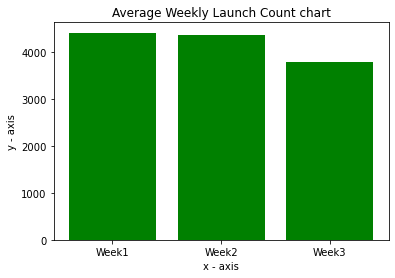

In [15]:
getAverageWeeklyUsage("launchCount")

# plot individual users launch count in seperate graphs

[7925, 8936, 7599]
0000000202
[1122, 1692, 1720]
2016615144
[5996, 5307, 4774]
2016331099
[4570, 3847, 3710]
2016331068
[1513, 1220, 1375]
2016331066
[1652, 1873, 1526]
2016331012
[2438, 2561, 3276]
2016331037
[1919, 1224, 1819]
2016331089
[4485, 3658, 4240]
2016331049
[7992, 6942, 4174]
2016331102
[5013, 5433, 3188]
2016331072
[8449, 9757, 8213]
510418137


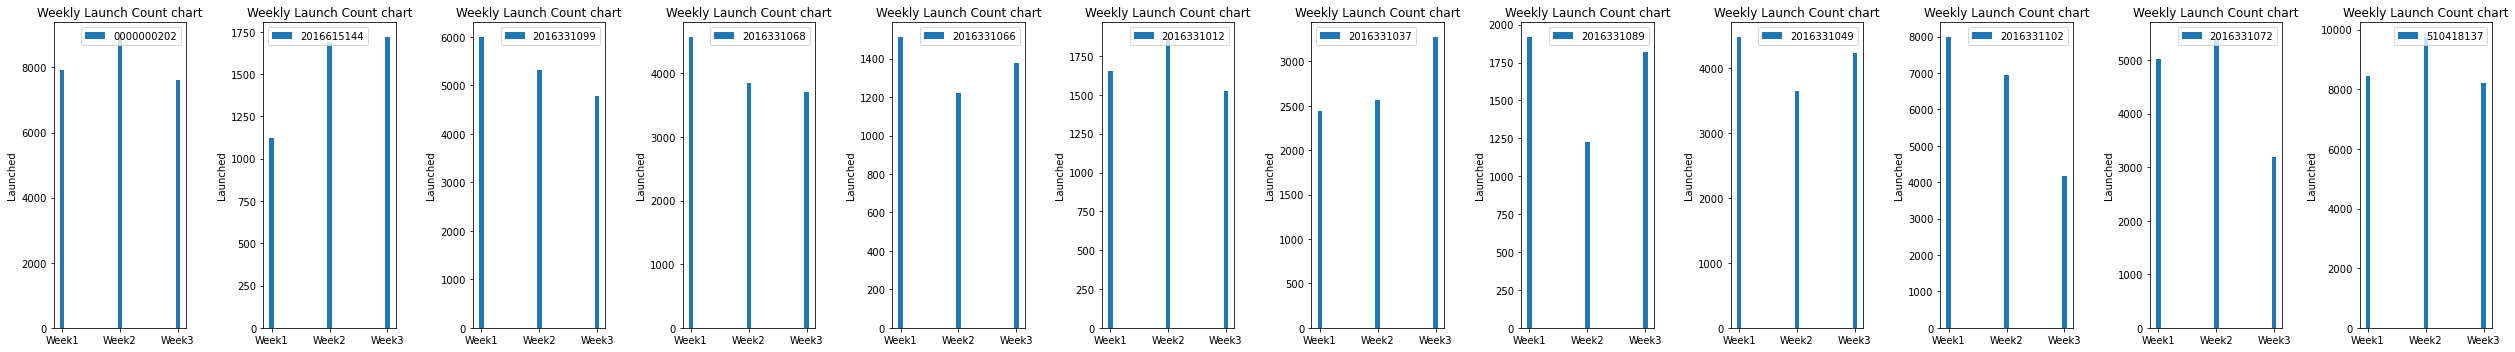

In [16]:
plotIndividualUsersUsageInSeperateGraphs("launchCount")

# show weekly usage of any specific app

In [17]:
#function

def getUsageOfSpecificApp(startTime,endTime,usage,packageName,hour):
    usageTime = 0
    for i in range(startTime,endTime,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                if hourlyUsage["packageName"] == packageName:
                    usageTime+=hourlyUsage["foregroundTime"]
    return usageTime

[388196, 178458, 108003]
0:6:28 , 0:2:58 , 0:1:48
0000000202
[80335, 99571, 183621]
0:1:20 , 0:1:39 , 0:3:3
2016615144
[40139, 12333, 0]
0:0:40 , 0:0:12 , 0:0:0
2016331099
[0, 11942, 0]
0:0:0 , 0:0:11 , 0:0:0
2016331068


E:\InstalledSoftwarefiles\miniconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


[260566, 90578, 88004]
0:4:20 , 0:1:30 , 0:1:28
2016331066
[343799, 269093, 24911]
0:5:43 , 0:4:29 , 0:0:24
2016331012
[145501, 80814, 32455]
0:2:25 , 0:1:20 , 0:0:32
2016331037
[0, 79398, 48058]
0:0:0 , 0:1:19 , 0:0:48
2016331089
[491879, 130652, 45557]
0:8:11 , 0:2:10 , 0:0:45
2016331049
[3010, 46155, 41733]
0:0:3 , 0:0:46 , 0:0:41
2016331102
[345112, 308083, 11292]
0:5:45 , 0:5:8 , 0:0:11
2016331072
[284097, 580683, 132053]
0:4:44 , 0:9:40 , 0:2:12
510418137


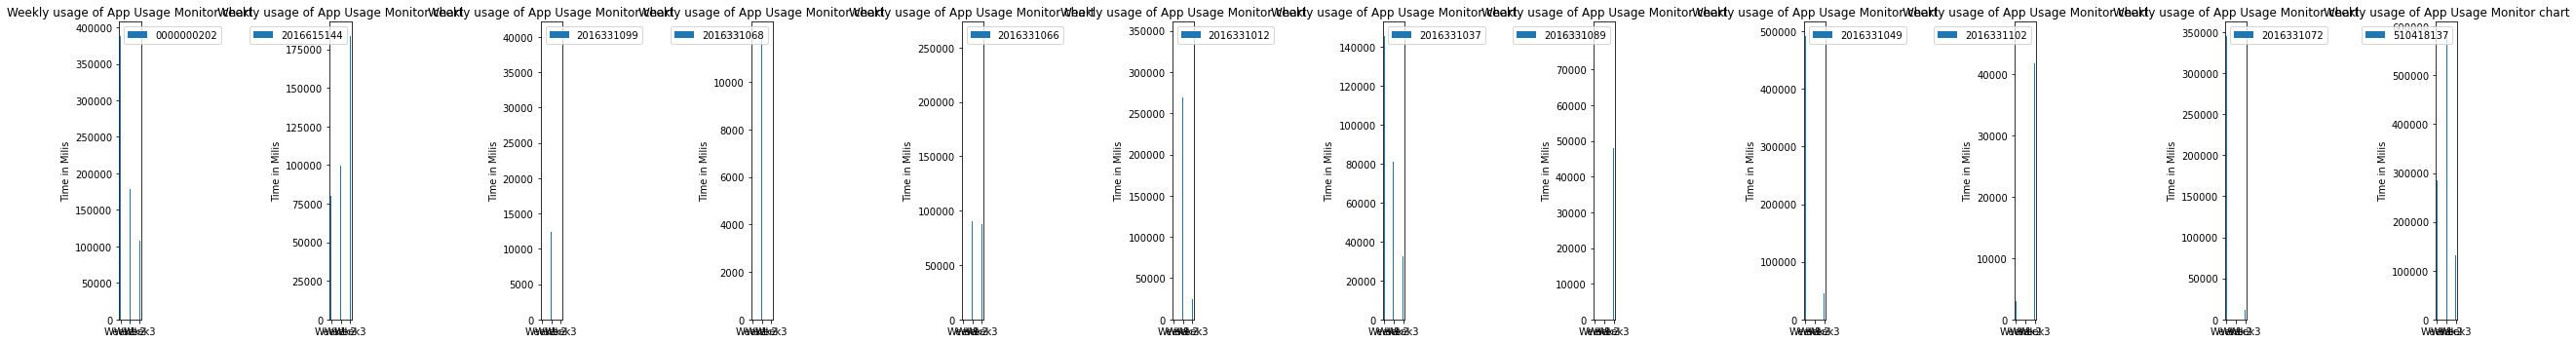

In [23]:
packageName =  "com.ahtrapotpid.appusagetracker"

"weekOneStartTime"
"weekTwoStartTime"
"weekThreeStartTime"

weekOne = 0
weekTwo = 0
weekThree = 0
weekFour = 0



userCount = 0

fig, ax = plt.subplots(ncols=len(st), figsize=(35, 5)) # len(st) number of user
#fig, ax = plt.subplots()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for key in userInfo:
    userCount+=1
    user = userInfo[key]
    weekTwo = user["weekTwoStartTime"]
    weekOne = weekTwo - weekPeriod
    weekThree = weekTwo + weekPeriod
    weekFour = weekThree + weekPeriod

    
    usage = usageHistory[key]
    avgUsage = [0,0,0]
    
    avgUsage[0] = getUsageOfSpecificApp(weekOne,weekTwo,usage,packageName,hour)
    avgUsage[1] = getUsageOfSpecificApp(weekTwo,weekThree,usage,packageName,hour)
    avgUsage[2] = getUsageOfSpecificApp(weekThree,weekFour,usage,packageName,hour)

    print(avgUsage)
    print("{0} , {1} , {2}".format(convertMillis(avgUsage[0]),convertMillis(avgUsage[1]),convertMillis(avgUsage[2])))
    print(key)
    
    tick_label = ['Week1', 'Week2', 'Week3']
    x = np.arange(0,21,10) # the label locations
    width = 0.8  # the width of the bars
    
    rect = ax[userCount-1].bar(x, avgUsage, width, label=key)
    #autolabel(rect)
    ax[userCount-1].set_ylabel('Time in Milis')
    ax[userCount-1].set_title('Weekly usage of App Usage Monitor chart')
    ax[userCount-1].set_xticks(x)
    ax[userCount-1].set_xticklabels(tick_label)
    ax[userCount-1].legend()
    fig.tight_layout()
    
plt.show()


# show top 10 app used(usage) in each week

In [19]:
#functions

def getDicto(startTime,endTime,hour,appsInstallationTime,usage,purpose,weekOne,dictionary):
    packageName = ""
    dicto = dictionary
    exclude = ["Quickstep","System launcher","Launcher3","POCO Launcher","System UI","One UI Home","Huawei Home"]
    
    for i in range(startTime,endTime,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                packageName = hourlyUsage["packageName"].replace('.','_dot_')
                if packageName in appsInstallationTime:
                    installTime = appsInstallationTime[packageName]['installationTime']
                    if installTime < weekOne:
                        if hourlyUsage['name'] in dicto and hourlyUsage['name'] not in exclude:
                            dicto[hourlyUsage['name']]+=hourlyUsage[purpose]
                        elif hourlyUsage['name'] not in exclude:
                             dicto[hourlyUsage['name']]=hourlyUsage[purpose]
                else:
                    #print(packageName)
                    pass
    return dicto

def getTopTen(purpose):
    
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0
    weekThree = 0
    weekFour = 0

    userCount = 0

    dicto1 = {}
    dicto2 = {}
    dicto3 = {}
    

    for key in userInfo:
        userCount+=1
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod


        usage = usageHistory[key]

        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        dicto1= getDicto(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne,dicto1)
        dicto2= getDicto(weekTwo,weekThree,hour,appsInstallationTime,usage,purpose,weekOne,dicto2)
        dicto3= getDicto(weekThree,weekFour,hour,appsInstallationTime,usage,purpose,weekOne,dicto3)


    for i in dicto1:
        dicto1[i]/=userCount
    for i in dicto2:
        dicto2[i]/=userCount
    for i in dicto3:
        dicto3[i]/=userCount

    week1 = sorted(dicto1.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
    week2 = sorted(dicto2.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
    week3 = sorted(dicto3.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
    week1.reverse()
    week2.reverse()
    week3.reverse()


    print("Week1 Week2 Week3")
    
    if purpose == "launchCount":
        
        for i in range(10):
            print(i+1, end =" ")
            print(" {0} used {1}".format(week1[i][0],week1[i][1]), end =" ")
            print("{0} used {1}".format(week2[i][0],week2[i][1]), end =" ")
            print("{0} used {1}".format(week3[i][0],week3[i][1]))
    else:
        for i in range(10):
            print(i+1, end =" ")
            print(" {0} used {1}".format(week1[i][0],convertMillis(week1[i][1])), end =" ")
            print("{0} used {1}".format(week2[i][0],convertMillis(week2[i][1])), end =" ")
            print("{0} used {1}".format(week3[i][0],convertMillis(week3[i][1])))

    fig, ax = plt.subplots(ncols=3, figsize=(35, 5)) # len(st) number of user
    #fig, ax = plt.subplots()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    data1 = [j for (i,j) in week1]
    tick_label1 = [i for (i,j) in week1]
    data2 = [j for (i,j) in week2]
    tick_label2 = [i for (i,j) in week2]
    data3 = [j for (i,j) in week3]
    tick_label3 = [i for (i,j) in week3]

    data = [data1,data2,data3]
    tick_label = [tick_label1,tick_label2,tick_label3]


    for i in range(3):
        x = np.arange(0,10) # the label locations
        width = 0.8  # the width of the bars

        rect = ax[i].bar(x, data[i], width, label="week"+str(i+1))
        #autolabel(rect)
        if purpose == "launchCount":
            ax[i].set_ylabel('LaunchCount')
        else:
            ax[i].set_ylabel('Time in Millis')
        ax[i].set_title('Top 10 used Apps in week'+str(i+1))
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(tick_label[i])
        ax[i].legend()
        fig.tight_layout()
    plt.show()

Week1 Week2 Week3
1  Facebook used 6:49:13 Facebook used 6:27:48 YouTube used 5:49:8
2  Messenger used 6:23:31 Messenger used 6:19:9 Facebook used 5:37:49
3  Chrome used 4:22:50 YouTube used 4:44:30 Messenger used 5:34:19
4  YouTube used 4:5:25 Chrome used 2:47:50 Chrome used 3:10:0
5  Lite used 1:26:0 WhatsApp used 1:31:30 Lite used 1:35:25
6  WhatsApp used 1:11:56 Lite used 1:30:1 WhatsApp used 1:29:8
7  Zoom used 1:3:39 Zoom used 0:50:49 Phone used 1:18:52
8  Phone used 1:3:7 Phone used 0:47:13 MX Player used 0:45:40
9  Gallery used 0:49:46 Adobe Acrobat used 0:44:50 Gallery used 0:33:32
10  Instagram used 0:39:38 MX Player used 0:29:23 Clock used 0:31:2


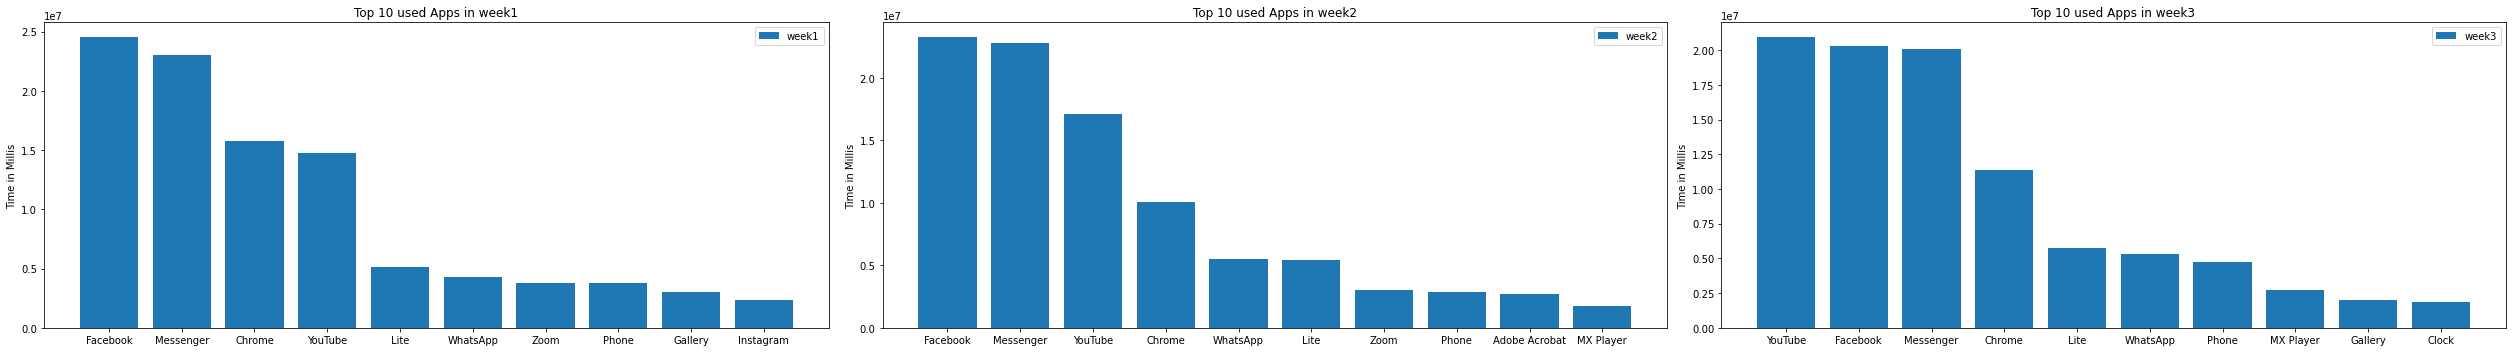

In [20]:
getTopTen("foregroundTime")

# show top 10 app used(launch) in each week

Week1 Week2 Week3
1  Facebook used 640.1666666666666 Facebook used 675.5 Facebook used 478.5833333333333
2  Messenger used 480.75 WhatsApp used 534.1666666666666 WhatsApp used 472.75
3  WhatsApp used 417.75 Messenger used 531.5 Messenger used 431.1666666666667
4  Gallery used 232.08333333333334 Gallery used 163.25 Gallery used 157.91666666666666
5  Chrome used 100.58333333333333 Phone used 86.08333333333333 YouTube used 84.58333333333333
6  Security used 94.66666666666667 Security used 82.25 Phone used 80.58333333333333
7  Phone used 76.25 Chrome used 80.58333333333333 Chrome used 78.0
8  MX Player used 74.83333333333333 YouTube used 68.5 Security used 75.83333333333333
9  Settings used 73.66666666666667 Contacts and dialer used 61.583333333333336 Contacts and dialer used 58.416666666666664
10  YouTube used 69.0 Settings used 53.333333333333336 Settings used 55.333333333333336


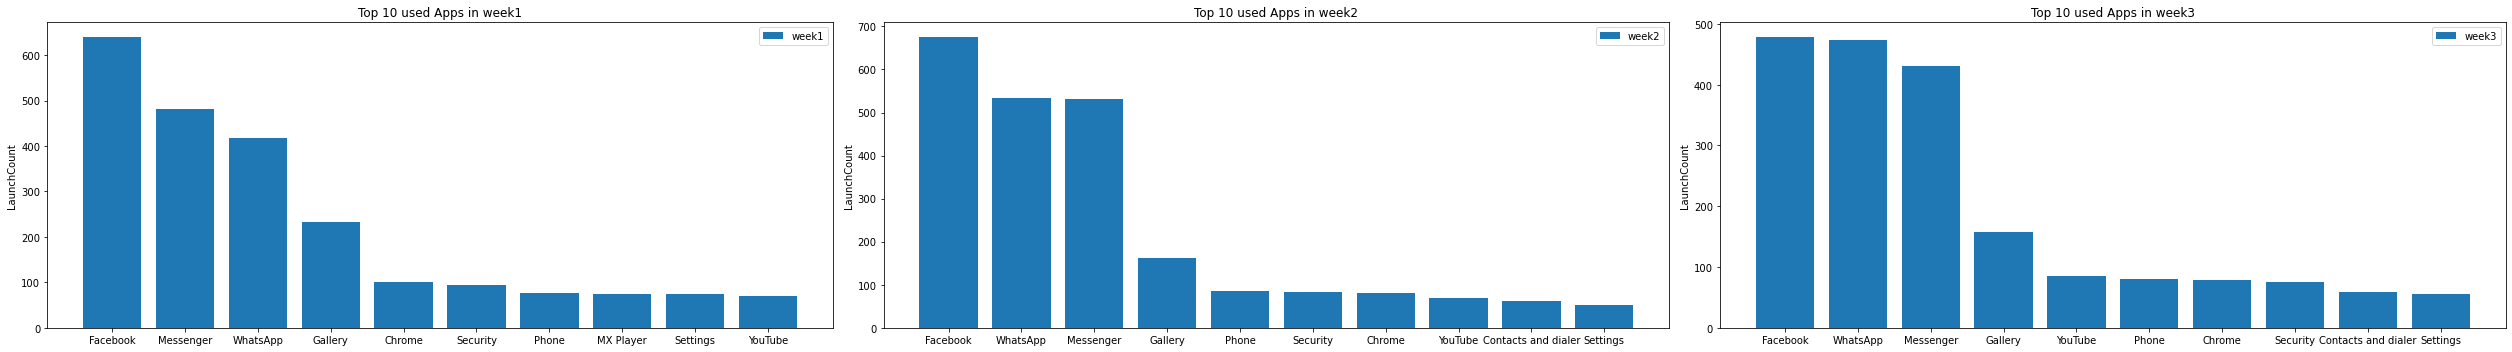

In [21]:
getTopTen("launchCount")

# Time periods when apps were used the most

In [22]:
weekOne = 0
weekTwo = 0

userCount = 0

dicto = {"LateAtNight":0,"LateEvening":0,"Afternoon":0,"Evening":0,"Morning":0}


for key in userInfo:
    userCount+=1
    user = userInfo[key]
    weekTwo = user["weekTwoStartTime"]
    weekOne = weekTwo - weekPeriod

    tempDicto = {"LateAtNight":0,"LateEvening":0,"Afternoon":0,"Evening":0,"Morning":0}
    usage = usageHistory[key]
    appsInstallationTime = targetHistory[key]['appsInstallationInfo']
    
    for i in range(weekOne,weekTwo,day):
        start = i
        end = i+6*hour
        tempDicto["LateAtNight"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["LateAtNight"]+=tempDicto["LateAtNight"]
        start = end
        end = end + 6 * hour
        tempDicto["Morning"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["Morning"]+=tempDicto["Morning"]
        start = end
        end = end + 6 * hour
        tempDicto["Afternoon"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["Afternoon"]+=tempDicto["Afternoon"]
        start = end
        end = end + 3 * hour
        tempDicto["Evening"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["Evening"]+=tempDicto["Evening"]
        start = end
        end = end + 3 * hour
        tempDicto["LateEvening"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["LateEvening"]+=tempDicto["LateEvening"]
    
    temp = sorted(tempDicto.items(), key = lambda kv:(kv[1], kv[0]))
    temp.reverse()
    print(key)
    print(temp)
        
for i in dicto:
        dicto[i]/=userCount
#temp = sorted(dicto.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
#temp.reverse()
#print(temp)

0000000202
[('Afternoon', 75230366), ('LateEvening', 49056778), ('LateAtNight', 46017478), ('Evening', 42772130), ('Morning', 19032759)]
2016615144
[('Afternoon', 30360887), ('LateEvening', 24465051), ('Evening', 19313232), ('Morning', 15627274), ('LateAtNight', 12582253)]
2016331099
[('Afternoon', 44964533), ('LateEvening', 44785386), ('LateAtNight', 27849915), ('Evening', 22055296), ('Morning', 12923776)]
2016331068
[('Afternoon', 45150756), ('LateAtNight', 35322520), ('LateEvening', 23424643), ('Evening', 23180774), ('Morning', 20904967)]
2016331066
[('LateAtNight', 34651282), ('Afternoon', 28352422), ('Evening', 18982608), ('Morning', 15189045), ('LateEvening', 3597341)]
2016331012
[('Evening', 24928223), ('Morning', 20660240), ('Afternoon', 14284137), ('LateEvening', 11139636), ('LateAtNight', 9968609)]
2016331037
[('Afternoon', 27433083), ('Morning', 16545970), ('LateEvening', 13650867), ('LateAtNight', 10324866), ('Evening', 10135803)]
2016331089
[('Afternoon', 118255255), ('Mor